In [ ]:
!wget https://zenodo.org/record/4498364/files/public_dataset.zip

--2021-07-07 02:59:25--  https://zenodo.org/record/4498364/files/public_dataset.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332806163 (1.2G) [application/octet-stream]
Saving to: ‘public_dataset.zip’

public_dataset.zip  100%[===================>]   1.24G  23.2MB/s    in 49s     

2021-07-07 03:00:15 (25.9 MB/s) - ‘public_dataset.zip’ saved [1332806163/1332806163]



In [ ]:
!unzip /content/public_dataset.zip

In [ ]:
!ls /content/public_dataset

In [ ]:
import glob 
import json
import os,subprocess
import pandas as pd
import shutil

In [ ]:
os.mkdir("wav")

In [ ]:
dir = "/content/public_dataset"
for file1 in os.listdir(dir):
    currDir = dir+"/"
    destDir = "/content/wav/"
    for file in os.listdir(currDir):
        name = file[:file.rfind(".")]
        print(name)
        subprocess.run(["ffmpeg", "-i", currDir+"/"+name+".webm",  destDir+"/"+name+".wav"])

In [ ]:
lstwav=[]
for file in glob.glob("/content/wav/*wav"):
  lstwav.append(file)

In [ ]:
lstwav[0][13:-4]

'ff8bfcc9-3df2-4752-8280-63f023fba31c'

In [ ]:
lst=[]
for i in range(len(lstwav)):
  wavpath='/content/public_dataset/' + lstwav[i][13:-4] +'.json'
  f=open(wavpath,"r")
  data=json.loads(f.read())
  floatv=float(data['cough_detected'])
  lst.append(floatv)
  f.close()

In [ ]:
lst[0:5]

[0.983, 0.0127, 0.9607, 0.6799, 0.782]

In [ ]:
df = pd.DataFrame(list(zip(lstwav,lst)), 
               columns =['wav_path', 'labels'])

In [ ]:
df

,wav_path,labels
0,/content/wav/ff8bfcc9-3df2-4752-8280-63f023fba...,0.9830
1,/content/wav/0ba0fa01-bf67-400b-af6f-d1897bce8...,0.0127
2,/content/wav/ab432238-ae66-40e0-88b6-74a3ee3a1...,0.9607
3,/content/wav/d6d50155-5eb2-421e-9da1-8ad5faa27...,0.6799
4,/content/wav/b2649939-ddbd-4154-8e37-7b50ca3e7...,0.7820
...,...,...
2904,/content/wav/dfecc93b-0a23-4322-80fe-8ce451394...,0.4601
2905,/content/wav/665858bb-8d30-48d0-beb4-cba991b57...,0.9975
2906,/content/wav/bc57e871-7953-40e7-a5bf-295924984...,0.9880
2907,/content/wav/d967a3f3-66fd-40b0-83a0-95f53cd84...,0.9698


In [ ]:
for i in range(len(lstwav)):
  if df['labels'][i]>0.5:
    df['labels'][i]=1
  else:
    df['labels'][i]=0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df

,wav_path,labels
0,/content/wav/ff8bfcc9-3df2-4752-8280-63f023fba...,1.0
1,/content/wav/0ba0fa01-bf67-400b-af6f-d1897bce8...,0.0
2,/content/wav/ab432238-ae66-40e0-88b6-74a3ee3a1...,1.0
3,/content/wav/d6d50155-5eb2-421e-9da1-8ad5faa27...,1.0
4,/content/wav/b2649939-ddbd-4154-8e37-7b50ca3e7...,1.0
...,...,...
2904,/content/wav/dfecc93b-0a23-4322-80fe-8ce451394...,0.0
2905,/content/wav/665858bb-8d30-48d0-beb4-cba991b57...,1.0
2906,/content/wav/bc57e871-7953-40e7-a5bf-295924984...,1.0
2907,/content/wav/d967a3f3-66fd-40b0-83a0-95f53cd84...,1.0


In [ ]:
df['labels'] = df['labels'].astype(int)

In [ ]:
df

,wav_path,labels
0,/content/wav/ff8bfcc9-3df2-4752-8280-63f023fba...,1
1,/content/wav/0ba0fa01-bf67-400b-af6f-d1897bce8...,0
2,/content/wav/ab432238-ae66-40e0-88b6-74a3ee3a1...,1
3,/content/wav/d6d50155-5eb2-421e-9da1-8ad5faa27...,1
4,/content/wav/b2649939-ddbd-4154-8e37-7b50ca3e7...,1
...,...,...
2904,/content/wav/dfecc93b-0a23-4322-80fe-8ce451394...,0
2905,/content/wav/665858bb-8d30-48d0-beb4-cba991b57...,1
2906,/content/wav/bc57e871-7953-40e7-a5bf-295924984...,1
2907,/content/wav/d967a3f3-66fd-40b0-83a0-95f53cd84...,1


In [ ]:
os.mkdir('Dataset')
os.mkdir('Dataset/Cough_Detected')
os.mkdir('Dataset/Cough_Not_Detected')

In [ ]:
df['wav_path'][0][13:]

'ff8bfcc9-3df2-4752-8280-63f023fba31c.wav'

In [ ]:
for i in range(len(lstwav)):
  source=df['wav_path'][i]
  destinationCough='/content/Dataset/Cough_Detected/'+df['wav_path'][i][13:]
  destinationNotCough='/content/Dataset/Cough_Not_Detected/'+df['wav_path'][i][13:]

  if df['labels'][i]==1:
    shutil.move(source, destinationCough)
  elif df['labels'][i]==0: 
    shutil.move(source, destinationNotCough)

In [ ]:
os.mkdir('New_Preprocesed_Dataset')
os.mkdir('New_Preprocesed_Dataset/Cough_Detected')
os.mkdir('New_Preprocesed_Dataset/Cough_Not_Detected')

In [ ]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import os,shutil
import math
import IPython.display as ipd
import cv2


def remove(string):
    return "".join(string.split())
i=1
currDir="/content/Dataset/"
directories = os.listdir(currDir)

base_dir = os.getcwd()
tar_dir = base_dir + '/New_Preprocesed_Dataset/'
destDir = tar_dir + directories[0]

folders = os.listdir(currDir+directories[0])


for folder in ['Cough_Not_Detected']:
        lst=[]
        ctr=140
        files = os.listdir(currDir+directories[0]+'/'+folder)
        print(files)
        for file in files:
          
          rate, X = scipy.io.wavfile.read(currDir+directories[0]+'/'+folder+'/'+file)
          a=np.array(X)
          if len(a.shape)==2:
            for i in range(len(X)):
              lst.append(X[i][0])
            length = np.shape(lst)[0]/float(rate)
          elif len(a.shape)==1:
            length = np.shape(X)[0]/float(rate)

          
          print(rate,X,length)
          if length:
            clips=[]
            if len(a.shape)==2:
              clips.append(lst[:])
            else:
              clips.append(X[:])  
            
          
          for clip in clips:
            ctr+=1
            start_ = int(np.random.uniform(-4800,4800))
            if start_ >= 0:
              wav_time_shift = np.r_[clip[start_:], np.random.uniform(-0.001,0.001, start_)]
            else:
              wav_time_shift = np.r_[np.random.uniform(-0.001,0.001, -start_), clip[:start_]]
                    
            plt.axis('off')
            plt.specgram(wav_time_shift, Fs=rate, cmap=plt.get_cmap("magma"))
            #plt.show()
            print(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png")
            plt.savefig(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png", bbox_inches='tight') 
            plt.close()
            ctr+=1

            

In [ ]:
!ls /content/drive/MyDrive/New_Preprocesed_Dataset/train/Cough_Not_Detected

_clip_1001.png	_clip_2057.png	_clip_3063.png	_clip_4099.png	_clip_5163.png
_clip_1003.png	_clip_2059.png	_clip_3065.png	_clip_409.png	_clip_5165.png
_clip_1005.png	_clip_205.png	_clip_3067.png	_clip_4101.png	_clip_5169.png
_clip_1007.png	_clip_2061.png	_clip_3071.png	_clip_4103.png	_clip_5173.png
_clip_1009.png	_clip_2063.png	_clip_3073.png	_clip_4105.png	_clip_5175.png
_clip_1011.png	_clip_2065.png	_clip_3075.png	_clip_4107.png	_clip_5177.png
_clip_1013.png	_clip_2067.png	_clip_3081.png	_clip_4109.png	_clip_5179.png
_clip_1015.png	_clip_2069.png	_clip_3083.png	_clip_4111.png	_clip_517.png
_clip_1019.png	_clip_2071.png	_clip_3085.png	_clip_4113.png	_clip_5183.png
_clip_1023.png	_clip_2073.png	_clip_3089.png	_clip_4117.png	_clip_5187.png
_clip_1027.png	_clip_2075.png	_clip_3093.png	_clip_4119.png	_clip_5189.png
_clip_1033.png	_clip_2079.png	_clip_3095.png	_clip_411.png	_clip_5191.png
_clip_1037.png	_clip_207.png	_clip_3101.png	_clip_4121.png	_clip_5193.png
_clip_1039.png	_clip_2081.png	

In [ ]:
import glob
from PIL import Image


for img in glob.glob("/content/drive/MyDrive/New_Preprocesed_Dataset/Cough_Not_Detected/*png"):
  image=Image.open(img)
  image=image.resize((349,231))
  image.save(img)

print("Target size achieved for all images")

Target size achieved for all images


In [ ]:
batch_size = 32

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
from scipy import ndimage
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, concatenate
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, GlobalAveragePooling2D, GlobalMaxPooling2D, Flatten, Concatenate, Conv2D, Input, Flatten, MaxPooling2D, UpSampling2D, concatenate, Cropping2D, Reshape, BatchNormalization

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/New_Preprocesed_Dataset',
    target_size=(231,349),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

Found 3957 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/New_Preprocesed_Dataset', 
    target_size=(231,349),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 1695 images belonging to 2 classes.


In [ ]:
test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/New_Preprocesed_Dataset',
    target_size=(231,349),
    batch_size=16,
    class_mode='binary',
    subset='validation')

Found 1695 images belonging to 2 classes.


In [ ]:
def Inception_V3():                           
    
    inputs = Input((231, 349, 3))
    inception_v3 = tf.keras.applications.InceptionV3(input_tensor=inputs, weights='imagenet', include_top=False)
    x = inception_v3.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(16, activation='relu')(x)
    y = Dense(1, activation='sigmoid')(x)
    for layer in inception_v3.layers:
        layer.trainable = False

    model = Model(inputs=inputs, outputs=y)

    return model  

In [ ]:
Inception_CNN=Inception_V3()

In [ ]:
Inception_CNN.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
Inception_CNN.load_weights('/content/drive/MyDrive/Deep_learning_model.h5')

In [ ]:
history = Inception_CNN.fit_generator(train_generator,
                                      steps_per_epoch = train_generator.samples // batch_size,                                                                                                                                                                                                                                                                                               
                                      validation_data = validation_generator,
                                      validation_steps = validation_generator.samples // batch_size,
                                      epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
123/123 [==============================] - 987s 8s/step - loss: 0.4048 - acc: 0.8089 - val_loss: 0.4336 - val_acc: 0.8113
Epoch 2/5
123/123 [==============================] - 981s 8s/step - loss: 0.4003 - acc: 0.8094 - val_loss: 0.4329 - val_acc: 0.8041
Epoch 3/5
123/123 [==============================] - 997s 8s/step - loss: 0.4005 - acc: 0.8173 - val_loss: 0.4334 - val_acc: 0.7981
Epoch 4/5
123/123 [==============================] - 996s 8s/step - loss: 0.4006 - acc: 0.8183 - val_loss: 0.4389 - val_acc: 0.7933
Epoch 5/5
123/123 [==============================] - 999s 8s/step - loss: 0.4158 - acc: 0.8020 - val_loss: 0.4319 - val_acc: 0.8083


In [ ]:
Inception_CNN.save_weights('Deep_learning_model.h5')

In [ ]:
predictions = Inception_CNN.predict_generator(generator=test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
y_true = test_generator.classes

In [ ]:
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_pred = np.argmax(predictions, axis=1)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
label_dict = ['Cough detected','Cough not detected']

In [ ]:

def print_confusion_matrix(confusion_matrix, class_names, figsize = (15,10), fontsize=14):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap='magma')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label',fontsize=20)
    return fig   

[[0.6934904]]


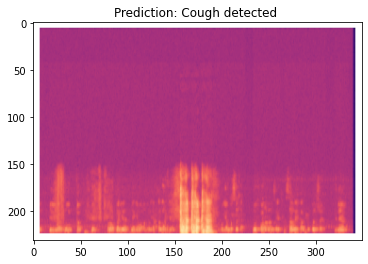

In [ ]:
import glob
from PIL import Image
i=0


test_file = []
for img in glob.glob("/content/test/*png"):
  test_file.append(img)
test_sample = np.ndarray(shape=(len(test_file),231,349,3),dtype=np.float32)  
i=0
for files in test_file:
  img=load_img(files)
  x=img_to_array(img)
  
  x=x.astype(np.float32) / 255.0
  test_sample[i]=x
  i+=1
result = Inception_CNN.predict(test_sample) 
print(result)
test_sample=np.reshape(test_sample, (231,349,3))
if result[0][0]>=0.5:
  plt.imshow(test_sample)
  plt.title("Prediction: Cough detected ")
else:
  plt.imshow(test_sample)
  plt.title("Prediction: Not detected cough ") 

[[0.4079343]]


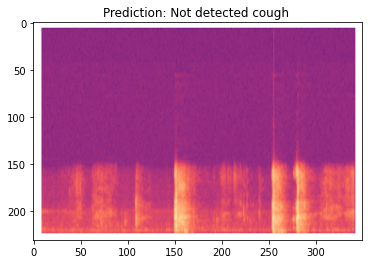

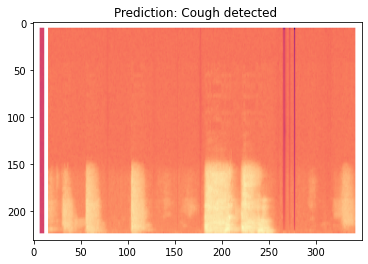

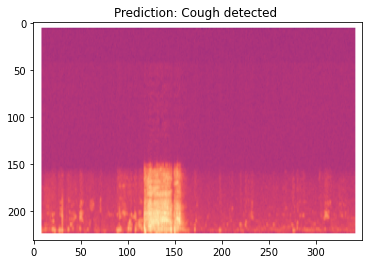

[[0.29157686]]


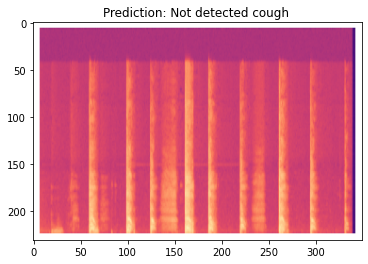

[[0.9189131]]


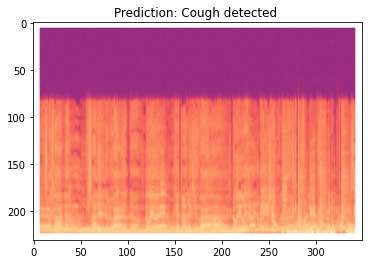

[[0.75453824]]


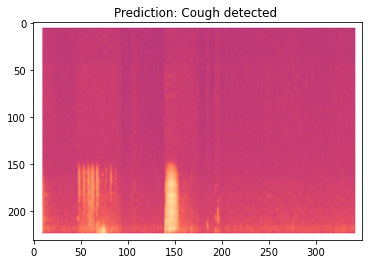

[[0.7350298]]


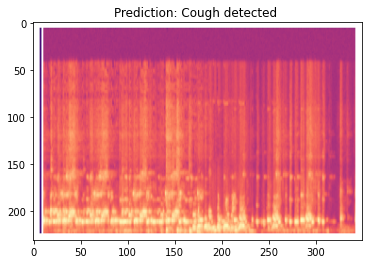

[[0.8665537]]


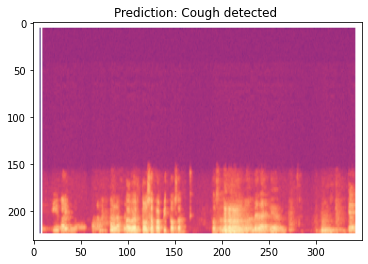

Confusion matrix:



<Figure size 360x360 with 0 Axes>

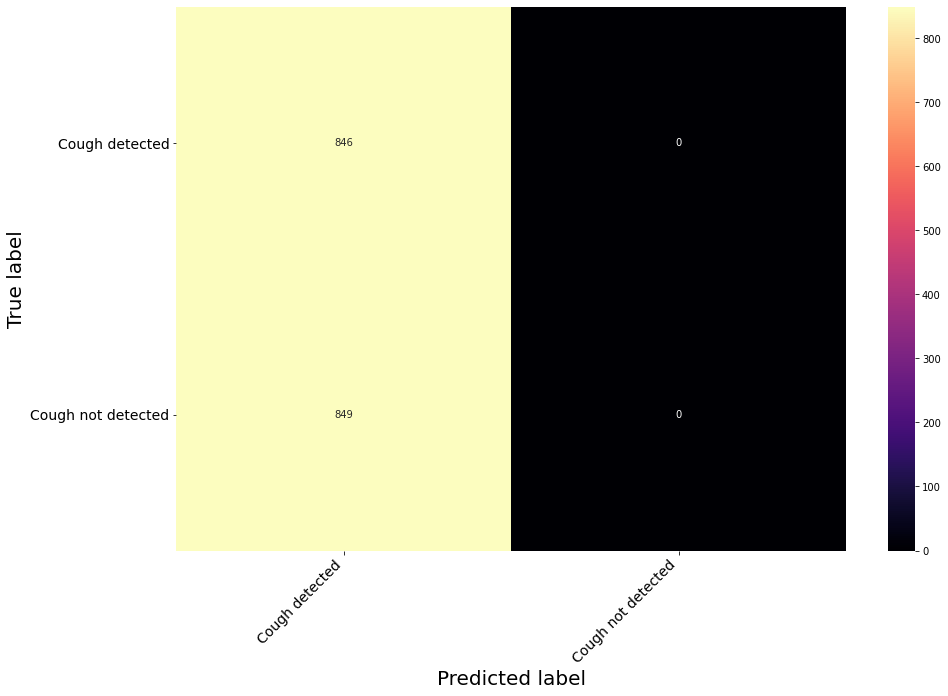

In [ ]:
plt.figure(figsize=(5,5))
cm = confusion_matrix(y_true, y_pred)
print_confusion_matrix(cm, label_dict)
print('Confusion matrix:\n')

In [ ]:
pip install tensorflow==2.3.1

In [ ]:
!git clone https://github.com/iiscleap/Coswara-Data.git

Cloning into 'Coswara-Data'...
remote: Enumerating objects: 613, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 613 (delta 12), reused 35 (delta 12), pack-reused 578
Receiving objects: 100% (613/613), 12.54 GiB | 39.87 MiB/s, done.
Resolving deltas: 100% (219/219), done.
Checking out files: 100% (158/158), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/Coswara-Data

/content/Coswara-Data


In [ ]:
!python extract_data.py

In [ ]:
import pandas as pd

In [ ]:
csv=pd.read_csv("/content/combined_data.csv")

In [ ]:
csv

,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,smoker,cold,ht,diabetes,fever,asthma,um,cough,ihd,bd,st,ftg,mp,loss_of_smell,cld,test_status,diarrhoea,pneumonia,ctScan,testType,test_date,vacc,ctDate,ctScore,others_resp,others_preexist
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,y,male,India,Anantapur,Andhra Pradesh,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,y,male,India,BENGALURU URBAN,Karnataka,n,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,y,female,United States,Pittsburgh,Pennsylvania,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,y,male,India,Bangalore,Karnataka,n,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,y,male,India,Nalanda,Bihar,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,aH6o5lYN6vh40RCFhfyBYjkQVH13,33,healthy,y,male,India,24pgs,West Bengal,n,True,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891,hRMSJF9xD6h9CmQJzB3phXKNnTI2,42,recovered_full,y,male,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,ZNTuppbDaCNybeDYGmyjJeYr93s1,27,healthy,y,female,India,NaN,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893,J7R2UkId7jU0aOSw5amaS8zJVIm1,37,healthy,y,male,India,NaN,Karnataka,n,NaN,NaN,NaN,NaN,True,NaN,n,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(csv["covid_status"].value_counts())

healthy                        1337
positive_mild                   178
no_resp_illness_exposed         154
resp_illness_not_identified      90
recovered_full                   64
positive_moderate                40
positive_asymp                   32
Name: covid_status, dtype: int64


In [ ]:
print(csv["test_status"].value_counts())

na    181
p     176
n     125
Name: test_status, dtype: int64


In [ ]:
len(csv)

1895

In [ ]:
Not_Covid=[]
Covid=[]
for i in range(len(csv)):
  if csv["covid_status"][i]=="healthy":
    Not_Covid.append(csv["id"][i])

  elif csv["covid_status"][i]=="positive_mild":
    Covid.append(csv["id"][i])

  elif csv["covid_status"][i]=="positive_moderate":
    Covid.append(csv["id"][i])

  elif csv["covid_status"][i]=="positive_asymp":
    Covid.append(csv["id"][i])

In [ ]:
Covid[0:10]

['y0TkG5sfyhadW3VSct50RTl3HN02',
 'xYCukI9rgMeslwjIYWheFtyZ6zk1',
 'Tvdak0zflIVWdvWsNj7l9Ur0k3m1',
 '31euepHD0deCxTd2nJ1wzXCk5EF3',
 'KcO2p01LdYga7563y95BkKII9Dh1',
 'RUZ93kkyD0hJ1v7awXutr6RgF943',
 'ptuwF1pj4ibIoVuZmt4nKb5naiZ2',
 'Cd7fkliPM2ZUM1skytvoU2vD8jK2',
 '46bIeJk9J8XrD4ND2IPRMQzjJBt2',
 'MF5f99sONpcYl5fYsVzh32XwSmm2']

In [ ]:
Not_Covid[0:10]

['iV3Db6t1T8b7c5HQY2TwxIhjbzD3',
 'AxuYWBN0jFVLINCBqIW5aZmGCdu1',
 'C5eIsssb9GSkaAgIfsHMHeR6fSh1',
 'YjbEAECMBIaZKyfqOvWy5DDImUb2',
 'aGOvk4ji0cVqIzCs1jHnzlw2UEy2',
 'rB5oGtrGYZR5uJUXEaDYrrredz13',
 'OW5RTM4WXPawz0QLpsfjsl4FqM22',
 'lF4uHVWCoBPlnxvapmUJ4ROtYV73',
 'LYJToDRYDZfpjBuNC6YkUcphr0q1',
 'pOZwqBg4NsVYWASmwwhXFq4UlpC2']

In [ ]:
import os
import shutil

In [ ]:
os.mkdir('Dataset')
os.mkdir('Dataset/Covid')
os.mkdir('Dataset/Not_Covid')

In [ ]:
!rm -r /content/Coswara-Data

In [ ]:
h=os.listdir('/content/a/Extracted_data/20210630/')
for i in h:
  for j in range(len(Covid)):
    if i==Covid[j]:
      print('present')
      shutil.move('/content/a/Extracted_data/20210630/'+i, '/content/Dataset/Covid') 

In [ ]:
h=os.listdir('/content/a/Extracted_data/20210630/')
for i in h:
  for j in range(len(Not_Covid)):
    if i==Not_Covid[j]:
      print('present')
      shutil.move('/content/a/Extracted_data/20210630/'+i, '/content/Dataset/Not_Covid') 


In [ ]:
REMOVE=['vowel-a.wav','vowel-e.wav','vowel-o.wav','counting-fast.wav','counting-normal.wav']

In [ ]:
import glob

In [ ]:
for i in range(len(Covid)):
  for j in REMOVE:
    a='/content/Dataset/Covid/' + Covid[i]+'/'+j
    os.remove(a)

In [ ]:
for i in range(len(Not_Covid)):
  for j in REMOVE:
    a='/content/Dataset/Not_Covid/' + Not_Covid[i]+'/'+j
    print(a)

In [ ]:
os.mkdir('New_Preprocesed_Dataset_1')
os.mkdir('New_Preprocesed_Dataset_1/Covid')
os.mkdir('New_Preprocesed_Dataset_1/Not_Covid')

os.mkdir('New_Preprocesed_Dataset_2')
os.mkdir('New_Preprocesed_Dataset_2/Covid')
os.mkdir('New_Preprocesed_Dataset_2/Not_Covid')

In [ ]:
import shutil

In [ ]:
for i in range(len(Covid)):
  for k in ['breathing-shallow.wav']:
    src='/content/Dataset/Covid/'+Covid[i]+'/'+k
    des='/content/Dataset/Covid/'+Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    os.rename(src,des)


In [ ]:
for i in range(len(Not_Covid)):
  for k in ['breathing-shallow.wav']:
    src='/content/Dataset/Not_Covid/'+Not_Covid[i]+'/'+k
    des='/content/Dataset/Not_Covid/'+Not_Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    os.rename(src,des)

In [ ]:
for i in range(len(Covid)):
  for k in ['cough-heavy.wav']:
    src='/content/Dataset/Covid/'+Covid[i]+'/'+k
    des='/content/Dataset/Covid/'+Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    os.rename(src,des)

In [ ]:
for i in range(len(Not_Covid)):
  for k in ['cough-heavy.wav']:
    src='/content/Dataset/Not_Covid/'+Not_Covid[i]+'/'+k
    des='/content/Dataset/Not_Covid/'+Not_Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    os.rename(src,des)

In [ ]:
for i in range(len(Covid)):
  for k in ['cough-shallow.wav']:
    src='/content/Dataset/Covid/'+Covid[i]+'/'+k
    des='/content/Dataset/Covid/'+Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    os.rename(src,des)

In [ ]:
for i in range(len(Not_Covid)):
  for k in ['cough-shallow.wav']:
    src='/content/Dataset/Not_Covid/'+Not_Covid[i]+'/'+k
    des='/content/Dataset/Not_Covid/'+Not_Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    os.rename(src,des)

In [ ]:
for i in range(len(Covid)):
  for k in ['cough-heavy.wav']:
    source='/content/Dataset/Covid/'+Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    destinationCovid2='/content/New_Preprocesed_Dataset_1/Covid/'+k[:-4]+'_'+str(i)+'.wav'
    shutil.move(source, destinationCovid2)
    print(source)
    print(destinationCovid2)


In [ ]:
for i in range(len(Not_Covid)):
  for k in ['cough-heavy.wav']:
    source='/content/Dataset/Not_Covid/'+Not_Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    destinationCovid2='/content/New_Preprocesed_Dataset_1/Not_Covid/'+k[:-4]+'_'+str(i)+'.wav'
    shutil.move(source, destinationCovid2)
  

In [ ]:
for i in range(len(Covid)):
  for k in ['cough-shallow.wav']:
    source='/content/Dataset/Covid/'+Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    destinationCovid2='/content/New_Preprocesed_Dataset_2/Covid/'+k[:-4]+'_'+str(i)+'.wav'
    shutil.move(source, destinationCovid2)
  

In [ ]:
for i in range(len(Not_Covid)):
  for k in ['cough-shallow.wav']:
    source='/content/Dataset/Not_Covid/'+Not_Covid[i]+'/'+k[:-4]+'_'+str(i)+'.wav'
    
    destinationCovid2='/content/New_Preprocesed_Dataset_2/Not_Covid/'+k[:-4]+'_'+str(i)+'.wav'
    shutil.move(source, destinationCovid2)
  

In [ ]:
os.mkdir('Dataset1/')
os.mkdir('Dataset1/Covid')
os.mkdir('Dataset1/Not_Covid')

os.mkdir('Dataset2/')
os.mkdir('Dataset2/Covid')
os.mkdir('Dataset2/Not_Covid')

In [ ]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import os,shutil
import math
import IPython.display as ipd
import cv2


def remove(string):
    return "".join(string.split())
i=1
currDir="/content/drive/MyDrive/New_Preprocesed_Dataset_2/"
directories = os.listdir(currDir)

base_dir = os.getcwd()
tar_dir = base_dir + '/Dataset2/'
destDir = tar_dir + directories[0]

folders = os.listdir(currDir+directories[0])


for folder in folders:
        lst=[]
        ctr=140
        files = os.listdir(currDir+directories[0]+'/'+folder)
        print(files)
        for file in files:
          
          rate, X = scipy.io.wavfile.read(currDir+directories[0]+'/'+folder+'/'+file)
          a=np.array(X)
          if len(a.shape)==2:
            for i in range(len(X)):
              lst.append(X[i][0])
            length = np.shape(lst)[0]/float(rate)
          elif len(a.shape)==1:
            length = np.shape(X)[0]/float(rate)

          
          print(rate,X,length)
          if length:
            clips=[]
            if len(a.shape)==2:
              clips.append(lst[:])
            else:
              clips.append(X[:])  
            
          
          for clip in clips:
            ctr+=1
            start_ = int(np.random.uniform(-4800,4800))
            if start_ >= 0:
              wav_time_shift = np.r_[clip[start_:], np.random.uniform(-0.001,0.001, start_)]
            else:
              wav_time_shift = np.r_[np.random.uniform(-0.001,0.001, -start_), clip[:start_]]
                    
            plt.axis('off')
            plt.specgram(wav_time_shift, Fs=rate, cmap=plt.get_cmap("magma"))
            #plt.show()
            print(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png")
            plt.savefig(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png", bbox_inches='tight') 
            plt.close()
            ctr+=1

            

['cough-shallow_201.wav', 'cough-shallow_47.wav', 'cough-shallow_286.wav', 'cough-shallow_199.wav', 'cough-shallow_266.wav', 'cough-shallow_117.wav', 'cough-shallow_13.wav', 'cough-shallow_182.wav', 'cough-shallow_90.wav', 'cough-shallow_298.wav', 'cough-shallow_268.wav', 'cough-shallow_158.wav', 'cough-shallow_82.wav', 'cough-shallow_91.wav', 'cough-shallow_86.wav', 'cough-shallow_6.wav', 'cough-shallow_115.wav', 'cough-shallow_230.wav', 'cough-shallow_20.wav', 'cough-shallow_284.wav', 'cough-shallow_269.wav', 'cough-shallow_97.wav', 'cough-shallow_105.wav', 'cough-shallow_250.wav', 'cough-shallow_193.wav', 'cough-shallow_156.wav', 'cough-shallow_17.wav', 'cough-shallow_222.wav', 'cough-shallow_131.wav', 'cough-shallow_101.wav', 'cough-shallow_128.wav', 'cough-shallow_178.wav', 'cough-shallow_223.wav', 'cough-shallow_142.wav', 'cough-shallow_100.wav', 'cough-shallow_95.wav', 'cough-shallow_102.wav', 'cough-shallow_241.wav', 'cough-shallow_174.wav', 'cough-shallow_211.wav', 'cough-shal

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


/content/Dataset2/train/Not_Covid/_clip_143.png
48000 [0 0 0 ... 0 0 2] 7.338666666666667
/content/Dataset2/train/Not_Covid/_clip_145.png
48000 [0 0 0 ... 0 0 0] 3.925333333333333
/content/Dataset2/train/Not_Covid/_clip_147.png
48000 [0 0 0 ... 5 5 5] 5.717333333333333
/content/Dataset2/train/Not_Covid/_clip_149.png
48000 [0 0 0 ... 0 0 0] 5.205333333333333
/content/Dataset2/train/Not_Covid/_clip_151.png
48000 [0 0 0 ... 0 0 0] 4.864
/content/Dataset2/train/Not_Covid/_clip_153.png
48000 [0 0 0 ... 0 0 0] 4.181333333333333
/content/Dataset2/train/Not_Covid/_clip_155.png
48000 [ 42  38  35 ... -14  -1   7] 4.352
/content/Dataset2/train/Not_Covid/_clip_157.png
48000 [0 0 0 ... 0 0 0] 4.266666666666667
/content/Dataset2/train/Not_Covid/_clip_159.png
48000 [0 0 0 ... 0 0 0] 6.826666666666667
/content/Dataset2/train/Not_Covid/_clip_161.png
48000 [ 0  0  0 ...  1 -1 -3] 5.034666666666666
/content/Dataset2/train/Not_Covid/_clip_163.png
48000 [ 0  0  0 ... -7 -5 -2] 4.778666666666667
/content/D

In [ ]:

# Python libraries used for the assignment.

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
from scipy import ndimage
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, concatenate
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, GlobalAveragePooling2D, GlobalMaxPooling2D, Flatten, Concatenate, Conv2D, Input, Flatten, MaxPooling2D, UpSampling2D, concatenate, Cropping2D, Reshape, BatchNormalization

In [ ]:
train_files_1 = []
train_files_2 = []
train_files_3 = []
train_files_4 = []


for img in glob.glob("/content/drive/MyDrive/Dataset1/Covid/*png"):
  train_files_1.append(img)


for img in glob.glob("/content/drive/MyDrive/Dataset1/Not_Covid/*png"):
  train_files_2.append(img)


for img in glob.glob("/content/drive/MyDrive/Dataset2/Covid/*png"):
  train_files_3.append(img)


for img in glob.glob("/content/drive/MyDrive/Dataset2/Not_Covid/*png"):
  train_files_4.append(img)      

In [ ]:
Covid_dataset_1 = np.ndarray(shape=(len(train_files_1),231,349,3),dtype=np.float32)
Not_Covid_dataset_1 = np.ndarray(shape=(len(train_files_2),231,349,3),dtype=np.float32)

Covid_dataset_2 = np.ndarray(shape=(len(train_files_3),231,349,3),dtype=np.float32)
Not_Covid_dataset_2 = np.ndarray(shape=(len(train_files_4),231,349,3),dtype=np.float32)

In [ ]:
i=0
for files in train_files_1:
  img=load_img(files)
  x=img_to_array(img)
  x=x.astype(np.float32) /255.0
  Covid_dataset_1[i]=x
  i+=1

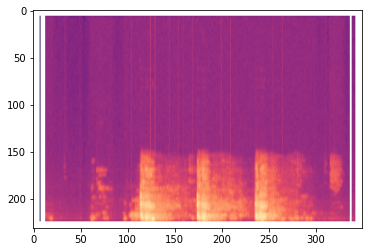

In [ ]:
plt.imshow(Covid_dataset_1[1])

In [ ]:
i=0
for files in train_files_2:
  img=load_img(files)
  x=img_to_array(img)
  x=x.astype(np.float32) /255.0
  Not_Covid_dataset_1[i]=x
  i+=1

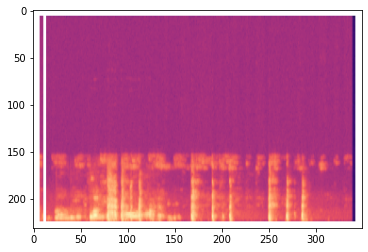

In [ ]:
plt.imshow(Not_Covid_dataset_1[1])

In [ ]:
i=0
for files in train_files_3:
  img=load_img(files)
  x=img_to_array(img)
  x=x.astype(np.float32) /255.0
  Covid_dataset_2[i]=x
  i+=1

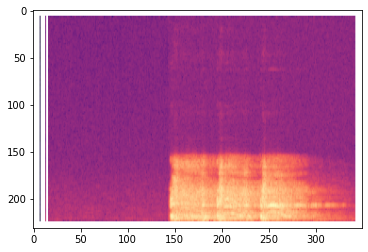

In [ ]:
plt.imshow(Covid_dataset_2[10])

In [ ]:
i=0
for files in train_files_4:
  img=load_img(files)
  x=img_to_array(img)
  x=x.astype(np.float32) /255.0
  Not_Covid_dataset_2[i]=x
  i+=1

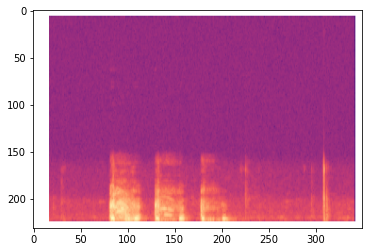

In [ ]:
plt.imshow(Not_Covid_dataset_2[20])

In [ ]:
folder_1 = "/content/drive/MyDrive/Dataset1/Covid"
folder_2 = "/content/drive/MyDrive/Dataset1/Not_Covid"
folder_3 = "/content/drive/MyDrive/Dataset2/Covid"
folder_4 = "/content/drive/MyDrive/Dataset2/Not_Covid"

In [ ]:
onlyfiles_1 = [f for f in os.listdir(folder_1) if os.path.isfile(os.path.join(folder_1, f))]
onlyfiles_2 = [f for f in os.listdir(folder_2) if os.path.isfile(os.path.join(folder_2, f))]
onlyfiles_3 = [f for f in os.listdir(folder_3) if os.path.isfile(os.path.join(folder_3, f))]
onlyfiles_4 = [f for f in os.listdir(folder_4) if os.path.isfile(os.path.join(folder_4, f))]

In [ ]:
onlyfiles_1[0:5]

['_clip_141.png',
 '_clip_145.png',
 '_clip_143.png',
 '_clip_151.png',
 '_clip_149.png']

In [ ]:
y_train_Covid_1 = []
y_train_Not_Covid_1 = []
y_train_Covid_2 = []
y_train_Not_Covid_2 = []

In [ ]:
for _file in onlyfiles_1:
    y_train_Covid_1.append(int(0))

for _file in onlyfiles_2:
    y_train_Not_Covid_1.append(int(1))


for _file in onlyfiles_3:
    y_train_Covid_2.append(int(0))


for _file in onlyfiles_4:
    y_train_Not_Covid_2.append(int(1))            

In [ ]:
y_train_Covid_1[0:5]

[0, 0, 0, 0, 0]

In [ ]:
y_train_Covid_2[0:5]

[0, 0, 0, 0, 0]

In [ ]:
y_train_Not_Covid_1[0:5]

[1, 1, 1, 1, 1]

In [ ]:
y_train_Not_Covid_2[0:5]

[1, 1, 1, 1, 1]

In [ ]:
Dataset1=np.vstack((Covid_dataset_1,Not_Covid_dataset_1))

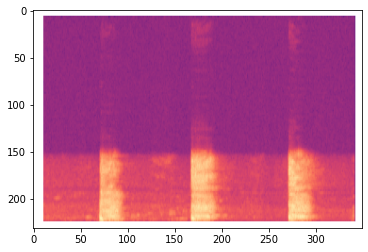

In [ ]:
plt.imshow(Dataset[30])

In [ ]:
Label1 = y_train_Covid_1  + y_train_Not_Covid_1  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Dataset1,Label1, test_size=0.2, random_state=33)

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
def Dense_Net_121():                           
    
    inputs = Input((231, 349, 3))
    inception_v3 = tf.keras.applications.DenseNet121(input_tensor=inputs, weights='imagenet', include_top=False)
    x = inception_v3.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(16, activation='relu')(x)
    y = Dense(1, activation='sigmoid')(x)
    for layer in inception_v3.layers:
        layer.trainable = False

    model = Model(inputs=inputs, outputs=y)

    return model  

In [ ]:
DenseNET_121 = Dense_Net_121()

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
DenseNET_121.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy', 
              metrics = ['acc'])                                             

history =DenseNET_121.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=10,batch_size=32)

Epoch 1/10
14/14 [==============================] - 118s 8s/step - loss: 0.2459 - acc: 0.9000 - val_loss: 0.7693 - val_acc: 0.7455
Epoch 2/10
14/14 [==============================] - 117s 8s/step - loss: 0.2739 - acc: 0.8864 - val_loss: 0.8038 - val_acc: 0.7000
Epoch 3/10
14/14 [==============================] - 117s 8s/step - loss: 0.2495 - acc: 0.8909 - val_loss: 0.7646 - val_acc: 0.7273
Epoch 4/10
14/14 [==============================] - 120s 9s/step - loss: 0.2162 - acc: 0.9114 - val_loss: 0.7303 - val_acc: 0.7727
Epoch 5/10
14/14 [==============================] - 120s 9s/step - loss: 0.1953 - acc: 0.9159 - val_loss: 0.6968 - val_acc: 0.8091
Epoch 6/10
14/14 [==============================] - 117s 8s/step - loss: 0.2165 - acc: 0.9091 - val_loss: 0.7176 - val_acc: 0.7455
Epoch 7/10
14/14 [==============================] - 117s 8s/step - loss: 0.2190 - acc: 0.9205 - val_loss: 0.7357 - val_acc: 0.7727
Epoch 8/10
14/14 [==============================] - 117s 8s/step - loss: 0.1856 - a

In [ ]:
DenseNET_121.save_weights('Deep_learning_model.h5')

In [ ]:
predictions = DenseNET_121.predict(X_test)

In [ ]:
y_pred = np.argmax(predictions, axis=1)

In [ ]:
label_dict = ['Cough detected','Cough not detected']

Confusion matrix:



<Figure size 360x360 with 0 Axes>

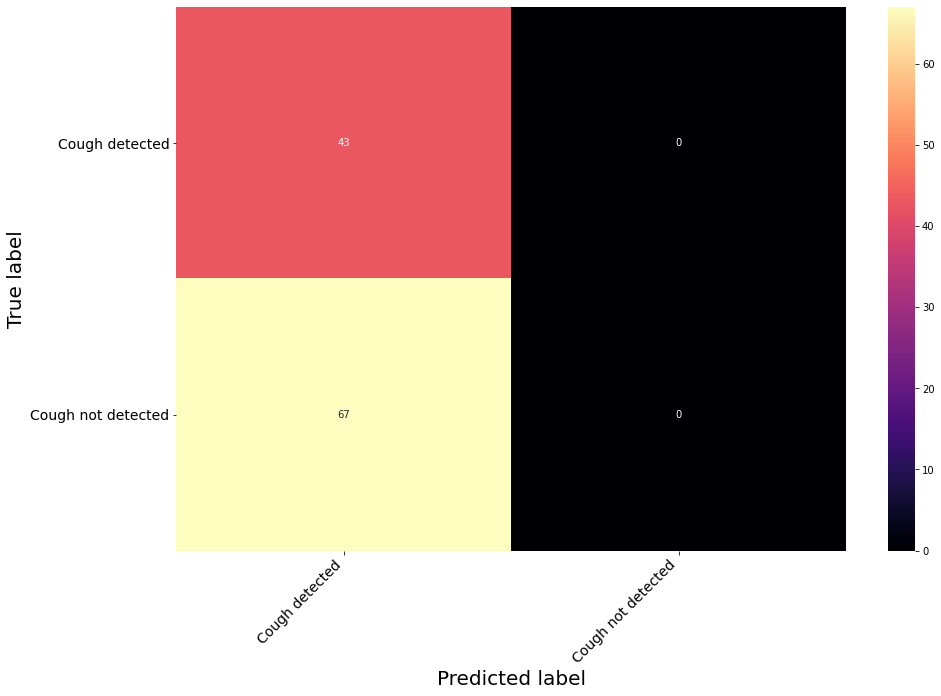

In [ ]:
plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test ,y_pred)
print_confusion_matrix(cm, label_dict)
print('Confusion matrix:\n')